In [1]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LogisticRegression
import warnings

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics
import operator
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
plt.style.use('seaborn') # pretty matplotlib plots


In [2]:
x_tr = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
x_te = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)
y_tr = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
y_te = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)

In [3]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [4]:
def transform(X,div):
    re = []
    counter = 1
    tmp = []
    for i in range(len(X)):
        tmp.append(X[i])
        if counter % div == 0:
            re.append(np.array(tmp))
            tmp = []
        counter += 1
    #print (np.array(re).shape)
    return np.array(re)

In [5]:
accuracy = [] # accuracy stores the score from the model using training data.
weight_000 = [] # weight_000 stores the weight of the first pixel for each iteration
loss = [] # loss stores the log loss from the model using testing data
for max_iter in range(1,41):
    clf = LogisticRegression(solver='liblinear',max_iter=max_iter).fit(x_tr, y_tr)
    weight_000.append(clf.coef_[0][0])
    accuracy.append(clf.score(x_tr,y_tr))
    y_pred = clf.predict_proba(x_tr)
    loss.append(sklearn.metrics.log_loss(y_tr,y_pred))

/Users/murtuzasayeed/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/murtuzasayeed/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/murtuzasayeed/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/murtuzasayeed/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Use

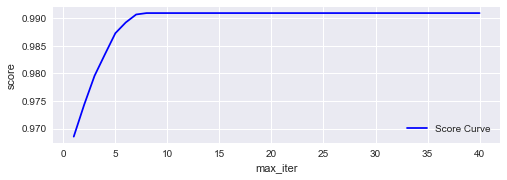

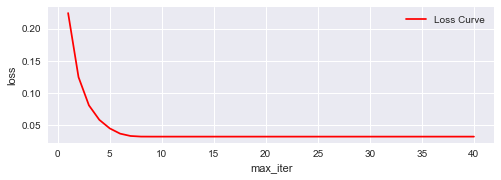

In [6]:
# TODO make plot
plt.figure()
plt.subplot(211)
plt.xlabel('max_iter')
plt.ylabel('score')
plt.plot([_ for _ in range(1,41)],accuracy, color='blue',label = "Score Curve")
plt.legend()
plt.show()

plt.subplot(212)
plt.xlabel('max_iter')
plt.ylabel('loss')
plt.plot([_ for _ in range(1,41)],loss, color='red',label = "Loss Curve")
plt.legend()
plt.show()

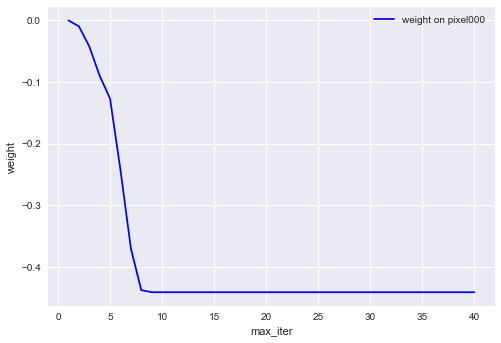

In [7]:
# TODO make plot
plt.xlabel('max_iter')
plt.ylabel('weight')
plt.plot([_ for _ in range(1,41)],weight_000, color='blue',label = "weight on pixel000")
plt.legend()
plt.show()

In [8]:
C_grid = np.logspace(-9, 6, 31)
C_accuracy = []
C_loss = []
for C in C_grid:
    LRM = LogisticRegression(solver='liblinear',C=C).fit(x_tr, y_tr)
    pred_te = LRM.predict_proba(x_te)
    C_accuracy.append(clf.score(x_te,y_te))
    C_loss.append(sklearn.metrics.log_loss(y_te,pred_te))

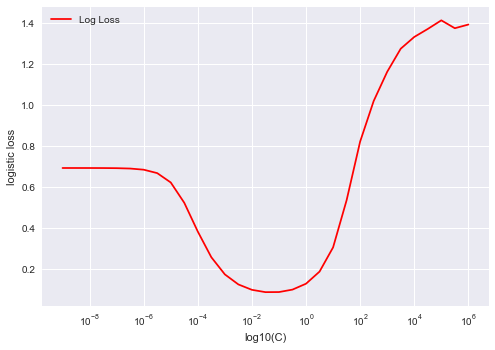

Best C-value for LR with 784-feature data: 0.0316228
Log-loss at best C-value: 0.0897
The accuracy under the best C value: 0.9576


In [9]:
plt.xscale('log')
plt.xlabel('log10(C)')
plt.ylabel('logistic loss')
plt.plot(C_grid,C_loss, color='red',label = "Log Loss")

plt.legend()
plt.show()
print("Best C-value for LR with 784-feature data: %.7f" % C_grid[np.argmin(C_loss)]) # TODO
print("Log-loss at best C-value: %.4f" % min(C_loss))
print("The accuracy under the best C value: %.4f" % C_accuracy[np.argmin(C_loss)])

In [10]:
bestC = C_grid[np.argmin(C_loss)]
clf = LogisticRegression(C=bestC,solver='liblinear').fit(x_tr, y_tr)
ypred_te = clf.predict(x_te)
print(calc_confusion_matrix_for_threshold(y_te,ypred_te,0.5))

Predicted    0    1
True               
0          942   32
1           33  976


In [11]:
false_pos = []
false_neg = []
for i in range(len(ypred_te)):
    if ypred_te[i] == 1 and y_te[i] == 0:
        false_pos.append(transform(x_te[i],28))
    if ypred_te[i] == 0 and y_te[i] == 1:
        false_neg.append(transform(x_te[i],28))

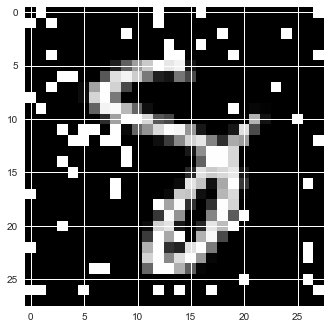

In [12]:
f = plt.figure()
#for i in range(9):
plt.imshow(X = false_pos[4],cmap='gray', vmin=0.0, vmax=1.0)
f.savefig("foo.pdf", bbox_inches='tight')

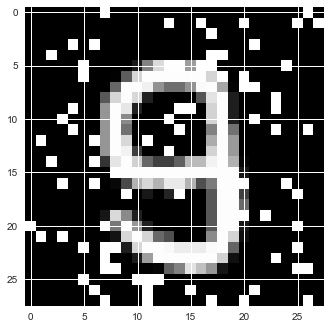

In [13]:
matplotlib.pyplot.imshow(X = false_neg[0],cmap='gray', vmin=0.0, vmax=1.0)

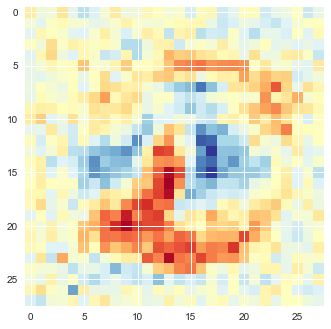

In [14]:
tt = transform(clf.coef_[0].transpose(),28)
tt.shape
matplotlib.pyplot.imshow(X = tt,cmap='RdYlBu', vmin=-0.5, vmax=0.5)


In [15]:
x_tr = np.loadtxt('./data_sneaker_vs_sandal/x_train.csv', delimiter=',', skiprows=1)
x_te = np.loadtxt('./data_sneaker_vs_sandal/x_test.csv', delimiter=',', skiprows=1)
y_tr = np.loadtxt('./data_sneaker_vs_sandal/y_train.csv', delimiter=',', skiprows=1)

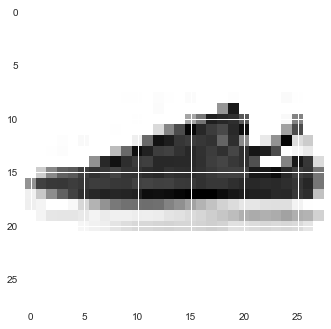

In [47]:
img_sneaker = transform(x_tr[0],28)
matplotlib.pyplot.imshow(X = img_sneaker,cmap='gist_yarg', vmin=0.0, vmax=1.0)

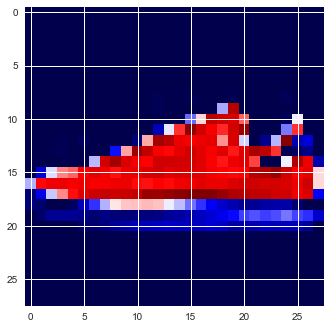

In [39]:
img_sneaker = transform(x_tr[0],28)
matplotlib.pyplot.imshow(X = img_sneaker,cmap='seismic', vmin=0.0, vmax=1.0)

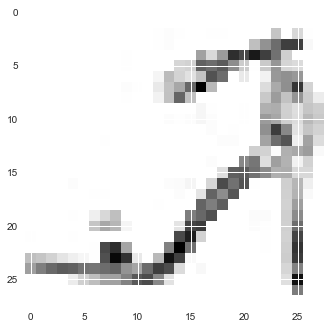

In [49]:
img_sandal = transform(x_tr[1],28)
matplotlib.pyplot.imshow(X = img_sandal,cmap='gist_yarg', vmin=0.0, vmax=1.0)

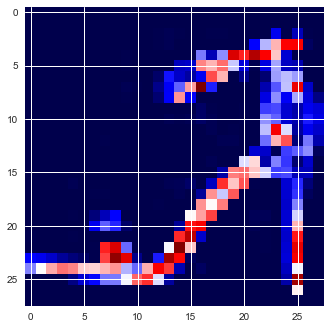

In [48]:
img_sandal = transform(x_tr[1],28)
matplotlib.pyplot.imshow(X = img_sandal,cmap='seismic', vmin=0.0, vmax=1.0)

In [20]:
%%time
clf = LogisticRegression(solver='liblinear').fit(x_tr, y_tr)
y_pred = clf.predict(x_te)
np.savetxt('yproba1_test.txt', y_pred)

CPU times: user 2.26 s, sys: 55.8 ms, total: 2.32 s
Wall time: 2.54 s


In [21]:
def generateFolds(x=None,y=None,k=1):
    xTrains=[]
    yTrains=[]
    step = int(len(x) / k)
    j = 0
    for i in range(k):
        rows = [_ for _ in range(j,j+step)]
        xTrains.append(np.delete(x,rows,0))
        yTrains.append(np.delete(y,rows,0))
        j += step
    return np.array(xTrains),np.array(yTrains)

In [22]:
def make_folds(num_folds=1,x=None, y=None):
    i = 0
    step = int(len(x) / num_folds)
    x_folds = list()
    y_folds = list()
    for k in range(num_folds):
        x_folds.append(x[i:i+step])
        y_folds.append(y[i:i+step])
        i += step
    
    # TODO: Complete method to generate partition into folds.
    
    return np.array(x_folds), np.array(y_folds)

In [23]:
k = 10 # building 10 folds
x_folds,y_folds = make_folds(k,x_tr,y_tr)

In [24]:
def TestingTrainingError(k,xTrains=None,yTrains=None,x_folds=None,y_dolfs=None):
    best_C = []
    best_score = []
    C_grid = np.logspace(-9, 6, 31)
    for i in range(k):
        print ("fold: %d"%i)
        C_accuracy = []
        C_loss = []
        xTrain = tuple(xTrains[i])
        yTrain = tuple(yTrains[i])
        xTest = tuple(x_folds[i])
        yTest = tuple(y_folds[i])
        #sorted_zip = sorted(zip(xTrain, yTrain), key=operator.itemgetter(0))
        #xTrain, yTrain = zip(*sorted_zip)
        for C in C_grid:
            LRM = LogisticRegression(solver='liblinear',C=C).fit(xTrain, yTrain)
            pred_te = LRM.predict_proba(xTest)
            C_accuracy.append(LRM.score(xTest,yTest))
            C_loss.append(sklearn.metrics.log_loss(yTest,pred_te))
        best_C.append(C_grid[np.argmin(C_loss)])
        best_score.append(np.array(C_accuracy))
        
    return np.array(best_C), np.array(best_score)

In [25]:
x_folds,y_folds = make_folds(k,x_tr,y_tr)
xTrains,yTrains = generateFolds(x_tr,y_tr,k)

In [26]:
best_C,score = TestingTrainingError(k,xTrains,yTrains,x_folds,y_folds)


fold: 0
fold: 1
fold: 2


/Users/murtuzasayeed/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/murtuzasayeed/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


fold: 3
fold: 4
fold: 5
fold: 6
fold: 7


/Users/murtuzasayeed/miniconda3/envs/ml135_env_sp21/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


fold: 8
fold: 9


In [27]:
best_C


array([1.        , 0.31622777, 1.        , 1.        , 0.31622777,
       1.        , 0.31622777, 0.31622777, 1.        , 0.31622777])

In [28]:
C_loss = []
for C in C_grid:
    LRM = LogisticRegression(solver='liblinear',C=C).fit(x_tr, y_tr)
    pred_tr = LRM.predict_proba(x_tr)
    C_accuracy.append(LRM.score(x_tr,y_tr))
    C_loss.append(sklearn.metrics.log_loss(y_tr,pred_tr))
curC = C_grid[np.argmin(C_loss)]
curC

316227.7660168379

In [29]:

np.array(C_loss).shape
# C_grid.shape

(31,)

In [30]:
clf = LogisticRegression(solver='liblinear',C=curC).fit(x_tr, y_tr)
y_pred_2 = clf.predict(x_te)
np.savetxt('yproba1_test.txt', y_pred_2)

In [31]:
k,xTrains,yTrains,x_folds,y_folds


(10,
 array([[[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         ...,
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]],
 
        [[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         ...,
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]],
 
        [[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
         [0.     , 0.     , 0.     , ..., 0.     , 

In [32]:
clf = LogisticRegression(solver='liblinear').fit(xTrains[0], yTrains[0])
y_pred_1 = clf.predict(x_folds[0])

clf = LogisticRegression(solver='liblinear',C=curC).fit(xTrains[0], yTrains[0])
y_pred_2 = clf.predict(x_folds[0])

In [33]:
fpr1, tpr1, thresholds1 = sklearn.metrics.roc_curve(y_folds[0], y_pred_1)
fpr2, tpr2, thresholds2 = sklearn.metrics.roc_curve(y_folds[0], y_pred_2)

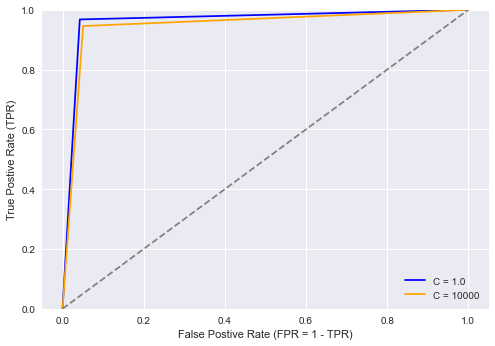

In [34]:
plt.ylim([0, 1]);
plt.plot(fpr1,tpr1, color='blue',label = "C = 1.0")
plt.plot(fpr2,tpr2, color='orange',label = "C = 10000")
plt.plot([0,1],[0,1], c='gray', linestyle='dashed')
plt.xlabel("False Postive Rate (FPR = 1 - TPR)");
plt.ylabel("True Postive Rate (TPR)");
plt.legend()
plt.show()

In [35]:
clf = LogisticRegression(solver='liblinear',C=0.5).fit(x_tr, y_tr)
y_pred_3 = clf.predict(x_te)
np.savetxt('yproba1_test.txt', y_pred_3)

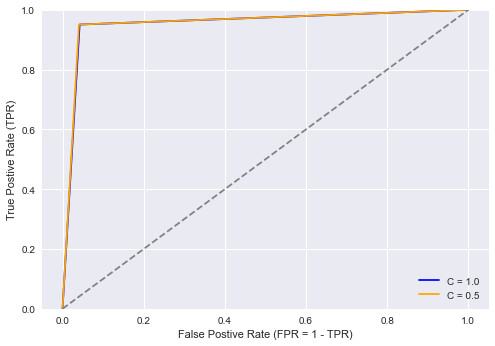

In [36]:
clf = LogisticRegression(solver='liblinear').fit(xTrains[3], yTrains[3])
y_pred_1 = clf.predict(x_folds[3])

clf = LogisticRegression(solver='liblinear',C=0.5).fit(xTrains[3], yTrains[3])
y_pred_2 = clf.predict(x_folds[3])

fpr1, tpr1, thresholds1 = sklearn.metrics.roc_curve(y_folds[3], y_pred_1)
fpr2, tpr2, thresholds2 = sklearn.metrics.roc_curve(y_folds[3], y_pred_2)
plt.ylim([0, 1]);
plt.plot(fpr1,tpr1, color='blue',label = "C = 1.0")
plt.plot(fpr2,tpr2, color='orange',label = "C = 0.5")
plt.plot([0,1],[0,1], c='gray', linestyle='dashed')
plt.xlabel("False Postive Rate (FPR = 1 - TPR)");
plt.ylabel("True Postive Rate (TPR)");
plt.legend()
plt.show()